In [2]:
import os
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from creds import getCensusAPI

path = os.path.abspath('')




https://www.census.gov/data/developers/data-sets/acs-1year.2019.html

https://www.census.gov/data/developers/data-sets/census-microdata-api.html

In [3]:
#Grab raw data

api_key = getCensusAPI()
#COW = "Class of worker"
        #  "9": "Unemployed and last worked 5 years ago or earlier or never worked",
        #  "7": "Self-employed in own incorporated business, professional practice or farm",
        #  "3": "Local government employee (city, county, etc.)",
        #  "8": "Working without pay in family business or farm",
        #  "5": "Federal government employee",
        #  "1": "Employee of a private for-profit co. or bus., or of an individual, for wages, salary, commissions",
        #  "4": "State government employee",
        #  "6": "Self-employed in own not incorporated business, professional practice, or farm",
        #  "2": "Employee of a private not-for-profit, tax-exempt, or charitable organization",
        #  "0": "N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)"
#ACCESS= "Access to the Internet"
        # "3": "No access to the Internet at this house, apartment, or mobile home",
        # "1": "Yes, by paying a cell phone company or Internet service provider",
        # "0": "N/A (GQ/vacant)",
        # "2": "Yes, without paying a cell phone company or Internet service provider"

#BROADBND = "Cellular data plan for a smartphone or other mobile device"
        #  "2": "No",
        #  "0": "N/A (GQ/vacant/no paid access to the internet)",
        #  "1": "Yes"
#COMPOTHX = "Other computer equipment"
        #  "0": "N/A (GQ/vacant)",
        #  "1": "Yes",
        #  "2": "No"
#DIALUP = "Dial-up service"
        # "0": "N/A (GQ/vacant/no paid access to the internet)",
        # "1": "Yes",
        # "2": "No"

#ENG = "Ability to speak English"
        #  "4": "Not at all",
        #  "1": "Very well",
        #  "3": "Not well",
        #  "0": "N/A (less than 5 years old/speaks only English)",
        #  "2": "Well"
#FHISPEEDP = "Broadband (high speed) Internet service such as cable, fiber optic, or DSL service allocation flag"
        #  "1": "Yes",
        #  "0": "No",
        #  "-1": "N/A (GQ)"

#HISPEED =  "Broadband (high speed) Internet service such as cable, fiber optic, or DSL service"
        #  "2": "No",
        #  "1": "Yes",
        #  "0": "N/A (GQ/vacant/no paid access to the internet)"

#FLAPTOPP = "Laptop or desktop allocation flag"
        #  "0": "No",
        #  "1": "Yes",
        #  "-1": "N/A (GQ)"

#LAPTOP = "Laptop or desktop"
        #  "2": "No",
        #  "0": "N/A (GQ/vacant)",
        #  "1": "Yes"

#FSEXP = "Sex allocation flag"
        #  "1": "Yes",
        #  "0": "No"
#SEX   = "sex"
        #  "1": "Male",
        #  "2": "Female"

#FTELP = "Telephone service allocation flag"
        #  "-1": "N/A (GQ)",
        #  "1": "Yes",
        #  "0": "No"
#TEL = "Telephone service"
        #  "1": "Yes",
        #  "8": "Suppressed for data year 2019 for select PUMAs",
        #  "0": "N/A (GQ/vacant)",
        #  "2": "No"
#SCHL = "Educational attainment"
        #  "16": "Regular high school diploma",
        #  "01": "No schooling completed",
        #  "04": "Grade 1",
        #  "03": "Kindergarten",
        #  "07": "Grade 4",
        #  "23": "Professional degree beyond a bachelor's degree",
        #  "19": "1 or more years of college credit, no degree",
        #  "22": "Master's degree",
        #  "10": "Grade 7",
        #  "20": "Associate's degree",
        #  "0": "N/A (less than 3 years old)",
        #  "02": "Nursery school, preschool",
        #  "21": "Bachelor's degree",
        #  "08": "Grade 5",
        #  "24": "Doctorate degree",
        #  "06": "Grade 3",
        #  "14": "Grade 11",
        #  "17": "GED or alternative credential",
        #  "12": "Grade 9",
        #  "15": "12th grade - no diploma",
        #  "13": "Grade 10",
        #  "05": "Grade 2",
        #  "11": "Grade 8",
        #  "18": "Some college, but less than 1 year",
        #  "09": "Grade 6"

#SMARTPHONE = "SMARTPHONE"
        #  "2": "No",
        #  "0": "N/A (GQ/vacant)",
        #  "1": "Yes"


#PUMA = "Public use microdata area code (PUMA) based on 2010 Census definition (areas with population of 100,000 or more, use with ST for unique code)"
        #"range": [
        #  {
        #    "min": "100",
        #    "max": "70301",
        #    "description": "Public use microdata area codes"
        #  }
        #]

#ST = "State of current residence"
#HINCP = "Household income (past 12 months, use ADJINC to adjust HINCP to constant dollars)"
        #"item": {
        # "-60000": "N/A(GQ/vacant)",
        # "0": "No household income",
        # "-59999": "Loss of -$59,999 or more"
        #}
#RAC1P = "Recoded detailed race code"
        #  "3": "American Indian alone",
        #  "1": "White alone",
        #  "6": "Asian alone",
        #  "9": "Two or More Races",
        #  "4": "Alaska Native alone",
        #  "2": "Black or African American alone",
        #  "7": "Native Hawaiian and Other Pacific Islander alone",
        #  "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
        #  "8": "Some other race alone"

columns = 'ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST'

url = 'https://api.census.gov/data/2019/acs/acs1/pums?get={}&key={}'.format(columns,api_key)
print(url)

df = pd.read_json(url)

df.rename(columns=df.iloc[0], inplace=True)
df.drop([0, 1], inplace=True)

df

https://api.census.gov/data/2019/acs/acs1/pums?get=ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST&key=268949463634955799b3cc2da21a4cf457510677


,ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST
2,0,0,0,0,0,0,0,0,1,0,12,0,-60000,1,3301,48
3,0,0,0,2,0,0,0,0,2,0,19,0,-60000,6,2100,18
4,0,0,0,1,0,0,0,0,1,0,21,0,-60000,1,600,4
5,0,0,0,1,0,0,0,0,2,0,16,0,-60000,1,5904,6
6,0,0,0,0,0,0,0,0,1,0,16,0,-60000,1,8500,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239549,1,1,2,7,2,0,1,2,1,1,21,1,158000,1,10701,6
3239550,1,1,2,6,2,1,2,2,1,1,18,1,102000,1,400,37
3239551,1,1,2,1,2,1,2,2,2,1,12,1,102000,1,400,37
3239552,1,2,2,1,2,0,2,2,1,1,20,1,112000,1,1100,48


(2318441, 16)
2580708
(2807147, 16)
{'01': 'No schooling completed', '02': 'Nursery school, preschool', '03': 'Kindergarten', '04': 'Grade 1', '05': 'Grade 2', '06': 'Grade 3', '07': 'Grade 4', '08': 'Grade 5', '09': 'Grade 6', '10': 'Grade 7', '11': 'Grade 8', '12': 'Grade 9', '13': 'Grade 10', '14': 'Grade 11', '15': '12th grade - no diploma', '16': 'Regular high school diploma', '17': 'GED or alternative credential', '18': 'Some college, but less than 1 year', '19': '1 or more years of college credit, no degree', '20': "Associate's degree", '21': "Bachelor's degree", '22': "Master's degree", '23': "Professional degree beyond a bachelor's degree", '24': 'Doctorate degree'}
education level: (14, 17], average income: 85593.74924336541, median income: 68000.0,total count: 605312, high speed internet: 0.7629255656587016, laptop: 0.8263424481920068
education level: (17, 19], average income: 96269.10954523624, median income: 76500.0,total count: 474708, high speed internet: 0.8135548589869

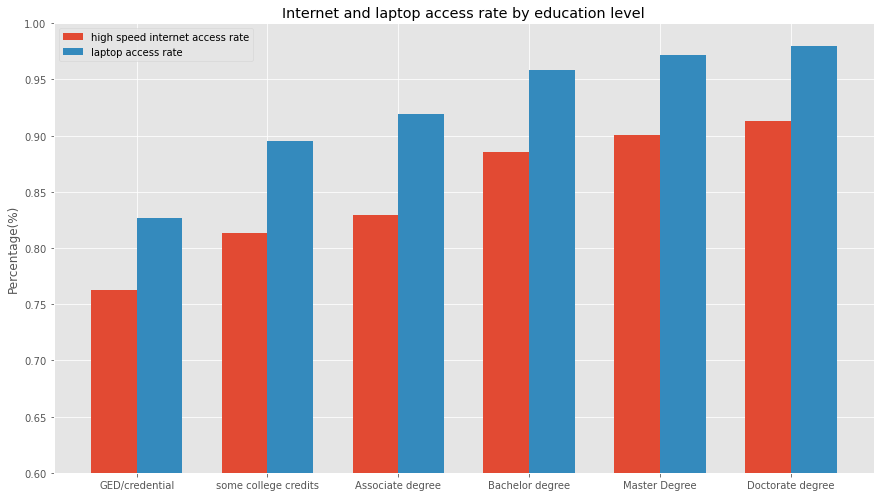

In [6]:


df['HINCP'] = pd.to_numeric(df['HINCP'])
df['SCHL'] = pd.to_numeric(df['SCHL'])

df_highspeed = df.loc[df['HISPEED'] == '1']
print(df_highspeed.shape)


df_laptop = df.loc[df['LAPTOP'] == '1']
print(df_laptop.shape[0])

df_valid = df.loc[(df['HISPEED'] != '0') & (df['LAPTOP'] != '0' ) & (df['HINCP'] != '-600000' )]
print(df_valid.shape)

education_levels = {
            "01": "No schooling completed",
            "02": "Nursery school, preschool",
            "03": "Kindergarten",
            "04": "Grade 1",
            "05": "Grade 2",
            "06": "Grade 3",
            "07": "Grade 4",
            "08": "Grade 5",
            "09": "Grade 6",
            "10": "Grade 7",                                
            "11": "Grade 8",
            "12": "Grade 9",
            "13": "Grade 10",
            "14": "Grade 11",
            "15": "12th grade - no diploma",
            "16": "Regular high school diploma",
            "17": "GED or alternative credential",
            "18": "Some college, but less than 1 year",
            "19": "1 or more years of college credit, no degree",
            "20": "Associate's degree",
            "21": "Bachelor's degree",
            "22": "Master's degree",
            "23": "Professional degree beyond a bachelor's degree",
            "24": "Doctorate degree"
}

print(education_levels)

edu_bins = [14, 17, 19, 20, 21, 23, 24]
hispeed_internet_access = []
laptop_access = []
for i in  range(1,  len(edu_bins)):
    start = edu_bins[i-1]
    end = edu_bins[i]

    df_edu = df_valid.loc[(df_valid['SCHL'] > start) & (df_valid['SCHL'] <= end)]
    count_total = df_edu.shape[0]
    average_income = df_edu['HINCP'].mean()
    media_income = df_edu['HINCP'].median()
    count_hispeed = df_edu[df_edu['HISPEED'] == '1'].shape[0]
    count_laptop = df_edu[df_edu['LAPTOP'] == '1'].shape[0]

    hispeed_internet_access.append( count_hispeed/count_total )
    laptop_access.append( count_laptop/count_total )
    output_str = 'education level: ({}, {}], average income: {}, median income: {},total count: {}, high speed internet: {}, laptop: {}'.format(start, end, average_income, media_income, count_total, count_hispeed/count_total, count_laptop/count_total)
    print(output_str)

# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [17, 19, 20, 21, 23, 24]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, hispeed_internet_access, width, label='high speed internet access rate')
plt.bar(ind + width, laptop_access, width, label='laptop access rate')

plt.ylim((0.6, 1))
plt.ylabel('Percentage(%)')
plt.title('Internet and laptop access rate by education level')

plt.xticks(ind + width / 2, ('GED/credential', 'some college credits', 'Associate degree', 'Bachelor degree', 'Master Degree', 'Doctorate degree'))
plt.legend(loc='best')
plt.show()

#range_end1 = 0

#df_range1 = df_valid.loc[(df_valid['HINCP'] >= min_income ) &( df_valid['HINCP'] < range_end1)]
#print(df_range1.shape)

#range_end2 = int(range_end1) + 10000
#df_range2 = df_valid.loc[(df_valid['HINCP'] >= range_end1 ) &( df_valid['HINCP'] < range_end2)]
#print(df_range2.shape)


max: 2907600
min: -15200
income range: [0, 10000], total count: 76051, high speed internet: 0.6878016068164784, laptop: 0.7002011807865774
income range: [10000, 20000], total count: 111780, high speed internet: 0.6917248166040436, laptop: 0.7015745213812846
income range: [20000, 50000], total count: 520983, high speed internet: 0.7433236785077441, laptop: 0.7938243666300052
income range: [50000, 100000], total count: 900715, high speed internet: 0.8160561331830823, laptop: 0.8924987371144035
income range: [100000, 200000], total count: 840386, high speed internet: 0.8775860140459265, laptop: 0.9547660241841249
income range: [200000, 500000], total count: 304584, high speed internet: 0.919802090720458, laptop: 0.9790698132534867
income range: [500000, 1000000], total count: 49030, high speed internet: 0.9287579033244953, laptop: 0.9827860493575362
income range: [1000000, 2907600], total count: 2865, high speed internet: 0.949738219895288, laptop: 0.9821989528795811


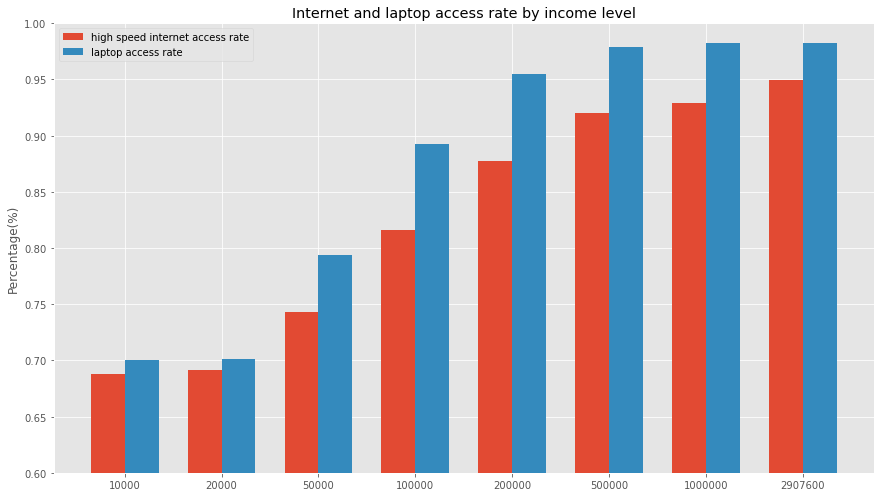

In [15]:
min_income = df_valid['HINCP'].min()
max_income = df_valid['HINCP'].max()

print('max: ' + str(max_income))
print('min: ' + str(min_income))

bins = [min_income, 0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, max_income]
#df_valid['HINCP'].value_counts(bins=bins, sort=False)

hispeed_internet_access2 = []
laptop_access2 = []
for i in range(2, len(bins)):
    begin = bins[i-1]
    end = bins[i]

    df_range = df_valid.loc[(df_valid['HINCP'] >= begin ) & ( df_valid['HINCP'] < end)]
    count_total = df_range.shape[0]
    count_hispeed = df_range[df_range['HISPEED'] == '1'].shape[0]
    count_laptop = df_range[df_range['LAPTOP'] == '1'].shape[0]

    hispeed_internet_access2.append(count_hispeed/count_total)
    laptop_access2.append(count_laptop/count_total)

    output_str = 'income range: [{}, {}], total count: {}, high speed internet: {}, laptop: {}'.format(begin, end, count_total, count_hispeed/count_total, count_laptop/count_total)
    print(output_str)

# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [10000, 20000, 50000, 100000, 200000, 500000, 1000000, max_income]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, hispeed_internet_access2, width, label='high speed internet access rate')
plt.bar(ind + width, laptop_access2, width, label='laptop access rate')

plt.ylim((0.6, 1))
plt.ylabel('Percentage(%)')
plt.title('Internet and laptop access rate by income level')

plt.xticks(ind + width / 2, (10000, 20000, 50000, 100000, 200000, 500000, 1000000, max_income))
plt.legend(loc='best')
plt.show()



{'1': 'White alone', '2': 'Black or African American alone', '3': 'American Indian alone', '4': 'Alaska Native alone', '5': 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races', '6': 'Asian alone', '7': 'Native Hawaiian and Other Pacific Islander alone', '8': 'Some other race alone', '9': 'Two or More Races'}
race: 1, average income: 117700.2495889618, total count: 2193835, high speed internet: 0.8284004950235546, laptop: 0.9016776557945333
race: 2, average income: 81330.01683350075, total count: 230968, high speed internet: 0.7773414498978214, laptop: 0.8079127844549895
race: 3, average income: 79752.27028723905, total count: 19113, high speed internet: 0.6932977554544028, laptop: 0.7712028462303144
race: 4, average income: 86373.09491978609, total count: 1496, high speed internet: 0.44786096256684493, laptop: 0.6510695187165776
race: 5, average income: 85214.94560404807, total count: 3162, high speed internet: 0.

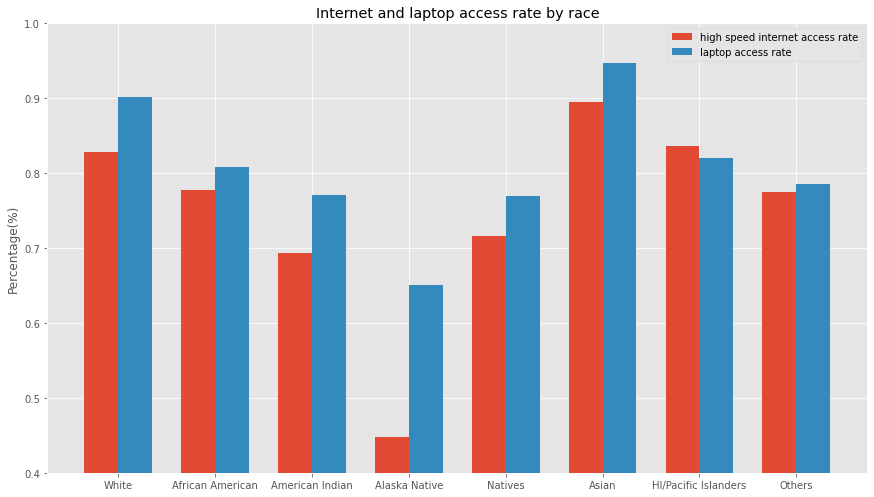

In [7]:
print('==============================================================\n')
races = { "1": "White alone",
          "2": "Black or African American alone",
          "3": "American Indian alone",
          "4": "Alaska Native alone",
          "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
          "6": "Asian alone",
          "7": "Native Hawaiian and Other Pacific Islander alone",
          "8": "Some other race alone",
          "9": "Two or More Races"
        }
print(races)
hispeed_internet_access3 = []
laptop_access3 = []

for i in range(1, 9):
    df_race = df_valid.loc[df_valid['RAC1P'] == str(i)]
    count_total = df_race.shape[0]
    average_income = df_race['HINCP'].mean()
    count_hispeed = df_race[df_race['HISPEED'] == '1'].shape[0]
    count_laptop = df_race[df_race['LAPTOP'] == '1'].shape[0]

    hispeed_internet_access3.append(count_hispeed/count_total)
    laptop_access3.append(count_laptop/count_total)

    output_str = 'race: {}, average income: {}, total count: {}, high speed internet: {}, laptop: {}'.format(i, average_income, count_total, count_hispeed/count_total, count_laptop/count_total)
    print(output_str)

# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [1, 2, 3, 4, 5, 6, 7, 8]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, hispeed_internet_access3, width, label='high speed internet access rate')
plt.bar(ind + width, laptop_access3, width, label='laptop access rate')

plt.ylim((0.4, 1))
plt.ylabel('Percentage(%)')
plt.title('Internet and laptop access rate by race')

plt.xticks(ind + width / 2, ('White', 'African American', 'American Indian', 'Alaska Native', 'Natives', 'Asian', 'HI/Pacific Islanders', 'Others'))
plt.legend(loc='best')
plt.show()



{'1': 'White alone', '2': 'Black or African American alone', '3': 'American Indian alone', '4': 'Alaska Native alone', '5': 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races', '6': 'Asian alone', '7': 'Native Hawaiian and Other Pacific Islander alone', '8': 'Some other race alone', '9': 'Two or More Races'}
race: 1, average income: 117700.2495889618, total count: 2193835, high speed internet: 0.5893469654737025, equipment: 0.8631401176478632
race: 2, average income: 81330.01683350075, total count: 230968, high speed internet: 0.4108664403726923, equipment: 0.7337250181843372
race: 3, average income: 79752.27028723905, total count: 19113, high speed internet: 0.42416156542667294, equipment: 0.7453565635954585
race: 4, average income: 86373.09491978609, total count: 1496, high speed internet: 0.45788770053475936, equipment: 0.8181818181818182
race: 5, average income: 85214.94560404807, total count: 3162, high speed

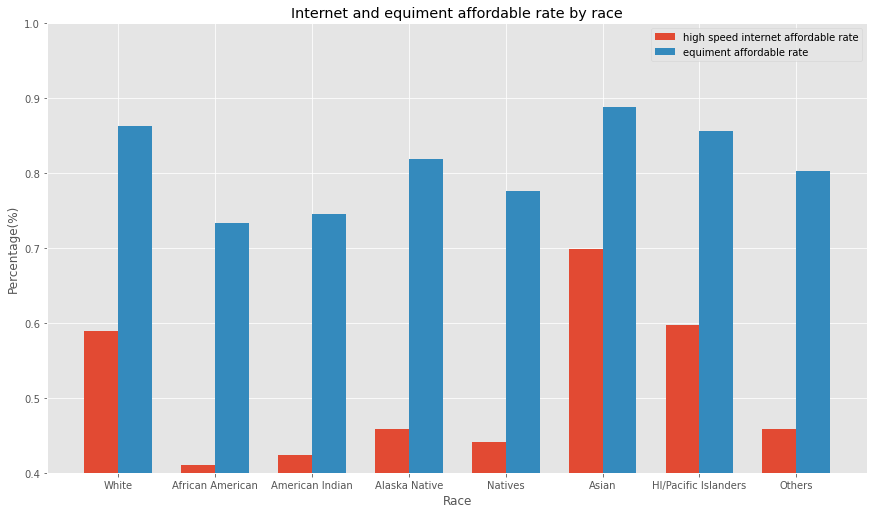

In [18]:
print('==============================================================\n')
races = { "1": "White alone",
          "2": "Black or African American alone",
          "3": "American Indian alone",
          "4": "Alaska Native alone",
          "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
          "6": "Asian alone",
          "7": "Native Hawaiian and Other Pacific Islander alone",
          "8": "Some other race alone",
          "9": "Two or More Races"
        }
print(races)

average_internet_price = 55 * 12
laptop_price = 1400

hispeed_internet_access4 = []
laptop_access4 = []

for i in range(1, 9):
    df_race = df_valid.loc[df_valid['RAC1P'] == str(i)]
    count_total = df_race.shape[0]
    average_income = df_race['HINCP'].mean()

    df_afford_internet = df_race[ (df_race[ 'HINCP' ] * 0.8 * 1.1/100 >= average_internet_price)]
    df_afford_laptop = df_race[(df_race[ 'HINCP' ] * 0.8 * 5.1/100 >= laptop_price)]
    count_hispeed = df_afford_internet.shape[0]
    count_laptop = df_afford_laptop.shape[0]

    hispeed_internet_access4.append(count_hispeed/count_total)
    laptop_access4.append(count_laptop/count_total)

    output_str = 'race: {}, average income: {}, total count: {}, high speed internet: {}, equipment: {}'.format(i, average_income, count_total, count_hispeed/count_total, count_laptop/count_total)
    print(output_str)

# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [1, 2, 3, 4, 5, 6, 7, 8]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, hispeed_internet_access4, width, label='high speed internet affordable rate')
plt.bar(ind + width, laptop_access4, width, label='equiment affordable rate')

plt.ylim((0.4, 1))
plt.ylabel('Percentage(%)')
plt.xlabel('Race')
plt.title('Internet and equiment affordable rate by race')

plt.xticks(ind + width / 2,  ('White', 'African American', 'American Indian', 'Alaska Native', 'Natives', 'Asian', 'HI/Pacific Islanders', 'Others'))
plt.legend(loc='best')
plt.show()

{'01': 'No schooling completed', '02': 'Nursery school, preschool', '03': 'Kindergarten', '04': 'Grade 1', '05': 'Grade 2', '06': 'Grade 3', '07': 'Grade 4', '08': 'Grade 5', '09': 'Grade 6', '10': 'Grade 7', '11': 'Grade 8', '12': 'Grade 9', '13': 'Grade 10', '14': 'Grade 11', '15': '12th grade - no diploma', '16': 'Regular high school diploma', '17': 'GED or alternative credential', '18': 'Some college, but less than 1 year', '19': '1 or more years of college credit, no degree', '20': "Associate's degree", '21': "Bachelor's degree", '22': "Master's degree", '23': "Professional degree beyond a bachelor's degree", '24': 'Doctorate degree'}
education level: (14, 17], average income: 85593.74924336541, total count: 605312, high speed internet: 0.4463830223091563, laptop: 0.7966536265595263
education level: (17, 19], average income: 96269.10954523624, total count: 474708, high speed internet: 0.5137705705402058, laptop: 0.8280205937123453
education level: (19, 20], average income: 102108.

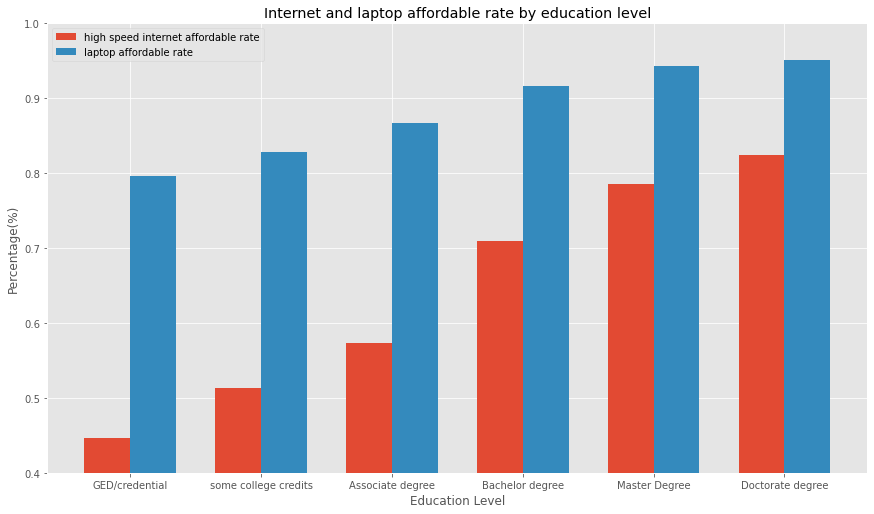

In [17]:
education_levels = {
            "01": "No schooling completed",
            "02": "Nursery school, preschool",
            "03": "Kindergarten",
            "04": "Grade 1",
            "05": "Grade 2",
            "06": "Grade 3",
            "07": "Grade 4",
            "08": "Grade 5",
            "09": "Grade 6",
            "10": "Grade 7",                                
            "11": "Grade 8",
            "12": "Grade 9",
            "13": "Grade 10",
            "14": "Grade 11",
            "15": "12th grade - no diploma",
            "16": "Regular high school diploma",
            "17": "GED or alternative credential",
            "18": "Some college, but less than 1 year",
            "19": "1 or more years of college credit, no degree",
            "20": "Associate's degree",
            "21": "Bachelor's degree",
            "22": "Master's degree",
            "23": "Professional degree beyond a bachelor's degree",
            "24": "Doctorate degree"
}

print(education_levels)

hispeed_internet_access5 = []
laptop_access5 = []

edu_bins = [14, 17, 19, 20, 21, 23, 24]
for i in  range(1,  len(edu_bins)):
    start = edu_bins[i-1]
    end = edu_bins[i]

    df_edu = df_valid.loc[(df_valid['SCHL'] > start) & (df_valid['SCHL'] <= end)]
    count_total = df_edu.shape[0]
    average_income = df_edu['HINCP'].mean()

    df_afford_internet = df_edu[ (df_edu[ 'HINCP' ] * 0.8 * 1.1/100 >= average_internet_price)]
    df_afford_laptop = df_edu[(df_edu[ 'HINCP' ] * 0.8 * 5.1/100 >= laptop_price)]
    count_hispeed = df_afford_internet.shape[0]
    count_laptop = df_afford_laptop.shape[0]

    hispeed_internet_access5.append( count_hispeed/count_total)
    laptop_access5.append(count_laptop/count_total)

    output_str = 'education level: ({}, {}], average income: {}, total count: {}, high speed internet: {}, laptop: {}'.format(start, end, average_income, count_total, count_hispeed/count_total, count_laptop/count_total)
    print(output_str)

# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [17, 19, 20, 21, 23, 24]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, hispeed_internet_access5, width, label='high speed internet affordable rate')
plt.bar(ind + width, laptop_access5, width, label='laptop affordable rate')

plt.ylim((0.4, 1))
plt.ylabel('Percentage(%)')
plt.xlabel('Education Level')
plt.title('Internet and laptop affordable rate by education level')

plt.xticks(ind + width / 2,  ('GED/credential', 'some college credits', 'Associate degree', 'Bachelor degree', 'Master Degree', 'Doctorate degree'))
plt.legend(loc='best')
plt.show()

In [9]:

    races = { "1": "White alone",
            "2": "Black or African American alone",
            "3": "American Indian alone",
            "4": "Alaska Native alone",
            "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
            "6": "Asian alone",
            "7": "Native Hawaiian and Other Pacific Islander alone",
            "8": "Some other race alone",
            "9": "Two or More Races"
            }
    print(races)

    average_internet_price = 55 * 12
    laptop_price = 1400
    
    print('race distribution among population affordable for internet:==================================================\n')
    df_afford_internet = df_valid[ (df_valid[ 'HINCP' ] * 0.8 * 1.1/100 >= average_internet_price)]
    total_count = df_valid.shape[0]
    total_internet = df_afford_internet.shape[0]
    for i in range(1, 9):
        df_race_total = df_valid.loc[df_valid['RAC1P'] == str(i)].shape[0]
        df_race = df_afford_internet.loc[df_afford_internet['RAC1P'] == str(i)]
        count_per_race = df_race.shape[0]

        output_str = 'race: {}, total count: {}, high speed internet: {}, race_proportion: {}'.format(i, count_per_race, count_per_race/total_internet, df_race_total/total_count)
        print(output_str)
    
    print('race distribution among population affordable for laptop:==================================================\n')
    df_afford_laptop = df_valid[(df_valid[ 'HINCP' ] * 0.8 * 5.1/100 >= laptop_price)]
    total_laptop = df_afford_laptop.shape[0]
    for i in range(1, 9):
        df_race = df_afford_laptop.loc[df_afford_laptop['RAC1P'] == str(i)]
        count_per_race = df_race.shape[0]

        output_str = 'race: {}, total count: {}, high speed internet: {}'.format(i, count_per_race, count_per_race/total_laptop)
        print(output_str)


{'1': 'White alone', '2': 'Black or African American alone', '3': 'American Indian alone', '4': 'Alaska Native alone', '5': 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races', '6': 'Asian alone', '7': 'Native Hawaiian and Other Pacific Islander alone', '8': 'Some other race alone', '9': 'Two or More Races'}
race distribution among population affordable for internet:==================================================

race: 1, total count: 1292930, high speed internet: 0.8018752368388901, race_proportion: 0.7815176761316739
race: 2, total count: 94897, high speed internet: 0.058855123131414805, race_proportion: 0.08227855541587241
race: 3, total count: 8107, high speed internet: 0.005027961718772773, race_proportion: 0.006808692241624682
race: 4, total count: 685, high speed internet: 0.0004248370269346675, race_proportion: 0.0005329254221456874
race: 5, total count: 1393, high speed internet: 0.0008639386547737107,

In [10]:
    
    
    
    races = { "1": "White alone",
            "2": "Black or African American alone",
            "3": "American Indian alone",
            "4": "Alaska Native alone",
            "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
            "6": "Asian alone",
            "7": "Native Hawaiian and Other Pacific Islander alone",
            "8": "Some other race alone",
            "9": "Two or More Races"
            }
    print(races)
    
    average_internet_price = 55 * 12
    laptop_price = 1400
    
    #df_afford_laptop = df_valid[(df_valid[ 'HINCP' ] * 0.8 * 5.1/100 >= laptop_price)]
    df_valid_income = df_valid[(df_valid[ 'HINCP' ] > 0) ]

    df_valid_income['months'] = df_valid_income.apply(lambda row: laptop_price / ((row[ 'HINCP' ]/12) * 0.8 * 5.1/100), axis=1)
    months_by_race = []
    for i in range(1, 9):
        df_race = df_valid_income.loc[df_valid_income['RAC1P'] == str(i)]
        average_month = df_race['months'].mean()
        median_month = df_race['months'].median()

        months_by_race.append(median_month)
        output_str = 'race: {}, average_month: {}, median_month: {}'.format(i, average_month, median_month)
        print(output_str)
    
    print("=============================================\n")
    months_by_edu = []
    edu_bins = [14, 17, 19, 20, 21, 23, 24]
    for i in  range(1,  len(edu_bins)):
        start = edu_bins[i-1]
        end = edu_bins[i]

        df_edu = df_valid_income.loc[(df_valid_income['SCHL'] > start) & (df_valid_income['SCHL'] <= end)]
        average_income = df_edu['months'].mean()
        median_month = df_edu['months'].median()

        months_by_edu.append(median_month)
        
        output_str = 'education level: [{}, {}], average_month: {}, median_month: {}'.format(start, end, average_month, median_month)
        print(output_str)
    

{'1': 'White alone', '2': 'Black or African American alone', '3': 'American Indian alone', '4': 'Alaska Native alone', '5': 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races', '6': 'Asian alone', '7': 'Native Hawaiian and Other Pacific Islander alone', '8': 'Some other race alone', '9': 'Two or More Races'}


<ipython-input-10-ec3319bbceb8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_income['months'] = df_valid_income.apply(lambda row: laptop_price / ((row[ 'HINCP' ]/12) * 0.8 * 5.1/100), axis=1)


race: 1, average_month: 15.01581259060208, median_month: 4.621377170396779
race: 2, average_month: 25.567680334004443, median_month: 6.556762832521543
race: 3, average_month: 21.465948244423142, median_month: 6.334841628959276
race: 4, average_month: 13.162754684086684, median_month: 5.967604433077579
race: 5, average_month: 79.02516536464749, median_month: 6.164156117667887
race: 6, average_month: 16.37768145442578, median_month: 3.519356460532931
race: 7, average_month: 14.152012587231876, median_month: 4.542369920928188
race: 8, average_month: 15.169068353424182, median_month: 5.882352941176471

education level: [14, 17], average_month: 15.169068353424182, median_month: 6.04647145201693
education level: [17, 19], average_month: 15.169068353424182, median_month: 5.347593582887701
education level: [19, 20], average_month: 15.169068353424182, median_month: 4.844290657439446
education level: [20, 21], average_month: 15.169068353424182, median_month: 3.702920016927635
education level: [2

        ACCESS BROADBND COMPOTHX COW DIALUP ENG HISPEED LAPTOP SEX TEL  SCHL  \
50442        1        1        2   4      2   0       1      1   1   1    22   
50443        1        1        2   0      2   1       1      1   2   1    21   
50444        1        1        2   0      2   1       1      2   2   1     7   
50445        1        1        2   0      2   1       1      1   2   1     6   
50446        1        1        2   0      2   0       1      1   2   1     0   
...        ...      ...      ...  ..    ...  ..     ...    ...  ..  ..   ...   
3239549      1        1        2   7      2   0       1      2   1   1    21   
3239550      1        1        2   6      2   1       2      2   1   1    18   
3239551      1        1        2   1      2   1       2      2   2   1    12   
3239552      1        2        2   1      2   0       2      2   1   1    20   
3239553      1        2        2   1      2   0       2      2   2   1    19   

        SMARTPHONE   HINCP RAC1P   PUMA

No handles with labels found to put in legend.


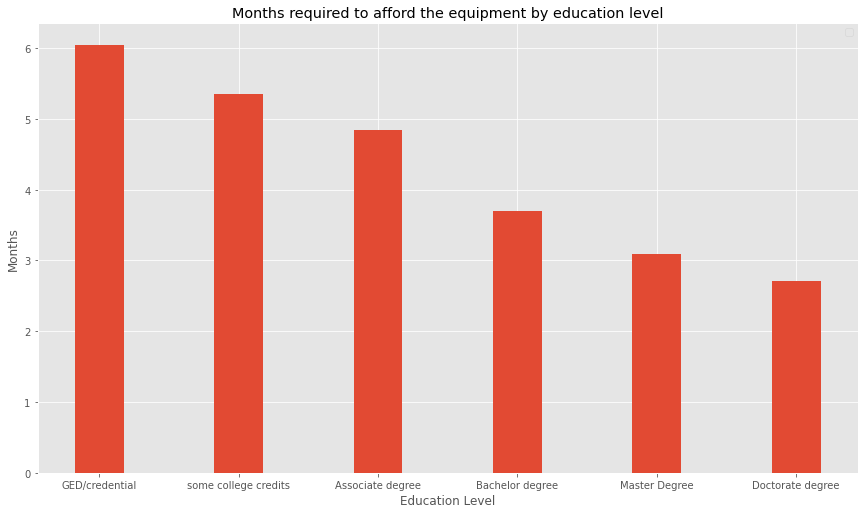

In [11]:
# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [17, 19, 20, 21, 23, 24]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(ind, months_by_edu, width)
#plt.bar(ind + width, laptop_access5, width, label='laptop affordable rate')

#plt.ylim((0.4, 1))
plt.ylabel('Months')
plt.xlabel('Education Level')
plt.title('Months required to afford the equipment by education level')

plt.xticks(ind,  ('GED/credential', 'some college credits', 'Associate degree', 'Bachelor degree', 'Master Degree', 'Doctorate degree'))
plt.legend(loc='best')
plt.show()

No handles with labels found to put in legend.


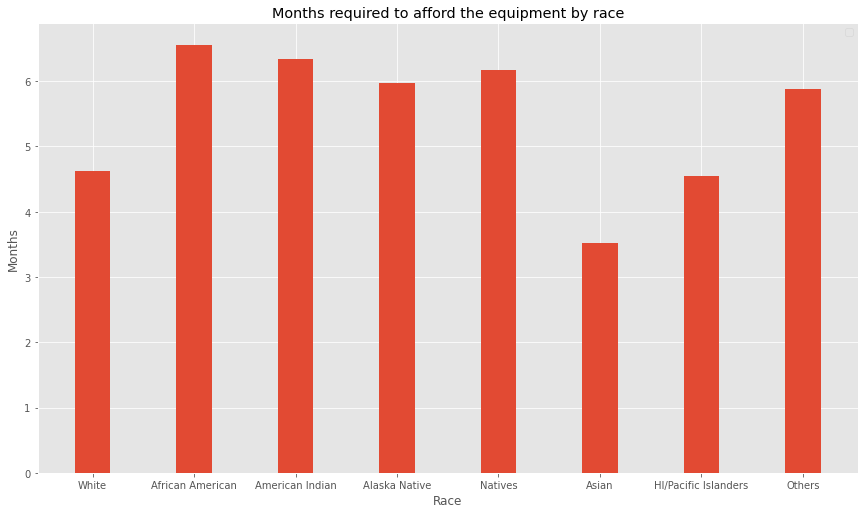

In [16]:
# draw the bar chart of the data.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

X = [1, 2, 3, 4, 5, 6, 7, 8]
ind = np.arange(len(X)) 

width = 0.35       
plt.bar(X, months_by_race, width)
#plt.bar(ind + width, laptop_access5, width, label='laptop affordable rate')

#plt.ylim((0.4, 1))
plt.ylabel('Months')
plt.xlabel('Race')
plt.title('Months required to afford the equipment by race')

plt.xticks(ind + 1, ('White', 'African American', 'American Indian', 'Alaska Native', 'Natives', 'Asian', 'HI/Pacific Islanders', 'Others'))
plt.legend(loc='best')
plt.show()